In [1]:
import ast




In [2]:
code="""
def Hello(name):
    print "hello"
    print name


Hello('what')
"""

In [27]:
code2="""

#what
net = InputLayer(name='input')(x_crop)

net.all_params

"""


code3="""
#what
net = InputLayer(x_crop, name='input')
net.all_params
"""

In [28]:
tree=ast.parse(code3)
for node in ast.walk(tree):
   
    if isinstance(node,ast.Call):
        print 'call def'
        for k,v in ast.iter_fields(node):
            print k,v
        
        print 'func'
        print node.func
        
        
        for arg in node.args:
            print arg
       
    
    if isinstance(node,ast.Attribute):
        print node.attr
        node.attr='all_weights'
            

call def
func <_ast.Name object at 0x7f9a74df6190>
args [<_ast.Name object at 0x7f9a74df61d0>]
keywords [<_ast.keyword object at 0x7f9a74df6210>]
starargs None
kwargs None
func
all_params


In [29]:
ast.dump(tree)



"Module(body=[Assign(targets=[Name(id='net', ctx=Store())], value=Call(func=Name(id='InputLayer', ctx=Load()), args=[Name(id='x_crop', ctx=Load())], keywords=[keyword(arg='name', value=Str(s='input'))], starargs=None, kwargs=None)), Expr(value=Attribute(value=Name(id='net', ctx=Load()), attr='all_weights', ctx=Load()))])"

In [30]:
import astunparse


print astunparse.unparse(tree)


net = InputLayer(x_crop, name='input')
net.all_weights



In [31]:
tre2=ast.parse("Hello()('what')")

print ast.dump(tre2)

tre1=ast.parse("Hello()")
print ast.dump(tre1)


tree.body[1]=tre2
print astunparse.unparse(tree)

Module(body=[Expr(value=Call(func=Call(func=Name(id='Hello', ctx=Load()), args=[], keywords=[], starargs=None, kwargs=None), args=[Str(s='what')], keywords=[], starargs=None, kwargs=None))])
Module(body=[Expr(value=Call(func=Name(id='Hello', ctx=Load()), args=[], keywords=[], starargs=None, kwargs=None))])

net = InputLayer(x_crop, name='input')
Hello()('what')



In [7]:
tree=ast.parse(code)
class FunctionCallRename(ast.NodeVisitor):
    def visit_Call(self,node):
        print node
        

 

FunctionCallRename().visit(tree)

print astunparse.unparse(tree)



def Hello(name):
    print 'hello'
    print name
Hello('what')



In [10]:
import showast

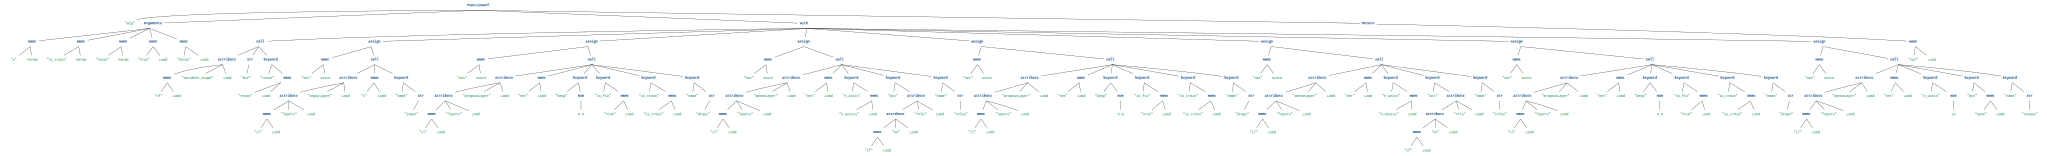

In [11]:
%%showast

def mlp(x, is_train=True, reuse=False):
    with tf.variable_scope("MLP", reuse=reuse):
        net = tl.layers.InputLayer(x, name='input')
        net = tl.layers.DropoutLayer(net, keep=0.8, is_fix=True, is_train=is_train, name='drop1')
        net = tl.layers.DenseLayer(net, n_units=n_units1, act=tf.nn.relu, name='relu1')
        net = tl.layers.DropoutLayer(net, keep=0.5, is_fix=True, is_train=is_train, name='drop2')
        net = tl.layers.DenseLayer(net, n_units=n_units2, act=tf.nn.relu, name='relu2')
        net = tl.layers.DropoutLayer(net, keep=0.5, is_fix=True, is_train=is_train, name='drop3')
        net = tl.layers.DenseLayer(net, n_units=10, act=None, name='output')
    return net


In [6]:
import ast
file_name='/home/fliu/tensorlayer/examples/basic_tutorials/tutorial_mlp_dropout1.py'
with open(file_name,'r') as f:
    code=f.read()
    
    

code='''

def mlp(x, is_train=True, reuse=False):
    with tf.variable_scope("MLP", reuse=reuse):
        net = InputLayer(x, name='input')
        net = DropoutLayer(net, keep=0.8, is_fix=True, is_train=is_train, name='drop1')
        net = DenseLayer(net, n_units=n_units1, act=tf.nn.relu, name='relu1')
        net = DropoutLayer(net, keep=0.5, is_fix=True, is_train=is_train, name='drop2')
        net = tl.layers.DenseLayer(net, n_units=n_units2, act=tf.nn.relu, name='relu2')
        net = tl.layers.DropoutLayer(net, keep=0.5, is_fix=True, is_train=is_train, name='drop3')
        net = tl.layers.DenseLayer(net, n_units=10, act=None, name='output')
    return net
mycall(tl.hello)

'''



    
tree=ast.parse(code)

        
        
treeNew=LayerCallRefactor().visit(tree)

treeNew=ast.fix_missing_locations(treeNew)


import astunparse

print astunparse.unparse(treeNew)

ATTR variable_scope
attr variable_scope
FUNCName InputLayer
refactoring
FUNCName DropoutLayer
refactoring
[<_ast.keyword object at 0x7f3bf024ecd0>, <_ast.keyword object at 0x7f3bf024ed50>, <_ast.keyword object at 0x7f3bf024edd0>, <_ast.keyword object at 0x7f3bf024ee50>]
FUNCName DenseLayer
refactoring
[<_ast.keyword object at 0x7f3bf0257050>, <_ast.keyword object at 0x7f3bf02570d0>, <_ast.keyword object at 0x7f3bf02571d0>]
FUNCName DropoutLayer
refactoring
[<_ast.keyword object at 0x7f3bf0257390>, <_ast.keyword object at 0x7f3bf0257410>, <_ast.keyword object at 0x7f3bf0257490>, <_ast.keyword object at 0x7f3bf0257510>]
ATTR DenseLayer
refactoring
[<_ast.keyword object at 0x7f3bf0257750>, <_ast.keyword object at 0x7f3bf02577d0>, <_ast.keyword object at 0x7f3bf02578d0>]
ATTR DropoutLayer
refactoring
[<_ast.keyword object at 0x7f3bf0257b10>, <_ast.keyword object at 0x7f3bf0257b90>, <_ast.keyword object at 0x7f3bf0257c10>, <_ast.keyword object at 0x7f3bf0257c90>]
ATTR DenseLayer
refactoring

In [8]:




'hello' in attr_rename.keys()

True

In [5]:
import ast 
tl_layers=['InputLayer','DropoutLayer','DenseLayer']
attr_rename={'hello':'world'}
kws=['is_train']

def refactorFunc(node):
    print 'refactoring'
    left_node=node.args[0]
    node.args=node.args[1:-1]
    
    print node.keywords
    kwl=[]
    for kw in node.keywords:
        if kw.arg in kws:
            kwl.append(kw)
        node.keywords.remove(kw)
        
    newNode=ast.Call(func=node,args=[left_node],keywords=kwl,starargs=[],kwargs=[])
    
    return newNode
                
            

class LayerCallRefactor(ast.NodeTransformer):
    def visit_Call(self,node):
        if isinstance( node.func,ast.Attribute):
            print 'ATTR',node.func.attr
            if node.func.attr in tl_layers:
                return refactorFunc(node)
            self.generic_visit(node)
                
                
        if isinstance( node.func,ast.Name):
            print 'FUNCName',node.func.id
            if node.func.id in tl_layers:
                return refactorFunc(node)    
            self.generic_visit(node)
        
        return node

    def visit_Attribute(self,node):
        print 'attr',node.attr
        if node.attr in attr_rename.keys():
            node.attr=attr_rename[node.attr]
        
        return node
 



import time
import tensorflow as tf
import tensorlayer as tl
tf.logging.set_verbosity(tf.logging.DEBUG)
tl.logging.set_verbosity(tl.logging.DEBUG)
sess = tf.InteractiveSession()
(X_train, y_train, X_val, y_val, X_test, y_test) = tl.files.load_mnist_dataset(shape=((-1), 784))
x = tf.placeholder(tf.float32, shape=[None, 784], name='x')
y_ = tf.placeholder(tf.int64, shape=[None], name='y_')
network = tl.layers.InputLayer(name='input')(x)
network = tl.layers.DropoutLayer(keep=0.8, name='drop1')(network)
network = tl.layers.DenseLayer(n_units=800, act=tf.nn.relu, name='relu1')(network)
network = tl.layers.DropoutLayer(keep=0.5, name='drop2')(network)
network = tl.layers.DenseLayer(n_units=800, act=tf.nn.relu, name='relu2')(network)
network = tl.layers.DropoutLayer(keep=0.5, name='drop3')(network)
network = tl.layers.DenseLayer(n_units=10, act=None, name='output')(network)
y = network.outputs
cost = tl.cost.cross_entropy(y, y_, name='xentropy')
correct_prediction = tf.equal(tf.argmax(y, 1),